In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Basics just used to learn and test
#Load data
data = load_iris()
#Put in a frame or use CSV format in pandas
X=pd.DataFrame(data.data,columns=data.feature_names)
#Use print(data.keys()) to see the parameters of a dataset
#Set the target of the given dataset on which we want to predicate using rest of the parameters
X['target']=data.target
#print(X)
#Remove it out of the CSV or dataframe to get better view
data=X.drop(columns="target")
data
X['target']
#This is just to see how the data can be represented figsize is just the size of the image of the data _ = X.hist(figsize=(30, 14))
#This is too see how many data points are there.Columns-1 is the parameters and rows is the amount of data samples
X['sepal length (cm)'].value_counts()
data.columns
#Used to get cross tab view of the data basically comparing 2 sides
pd.crosstab(index=X["sepal length (cm)"], columns=X["sepal width (cm)"])
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
_ = model.fit(data,X['target'])
target_predicted = model.predict(data)

target_name = "target"
target = X[target_name]

target_predicted[:5]
target[:5]
(target == target_predicted).mean()
#Instead of training and predicating the data we can directly get the score of the model from here.
accuracy = model.score(data, target)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is {accuracy:.3f}")
data.dtypes

The test accuracy using a KNeighborsClassifier is 0.967


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Number of samples in testing: 38 => 25.3% of the original set
Number of samples in training: 112 => 74.7% of the original set
0.9642857142857143
Confusion Matrix:
 [[35  0  0]
 [ 0 36  3]
 [ 0  1 37]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.92      0.95        39
           2       0.93      0.97      0.95        38

    accuracy                           0.96       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.96      0.96       112



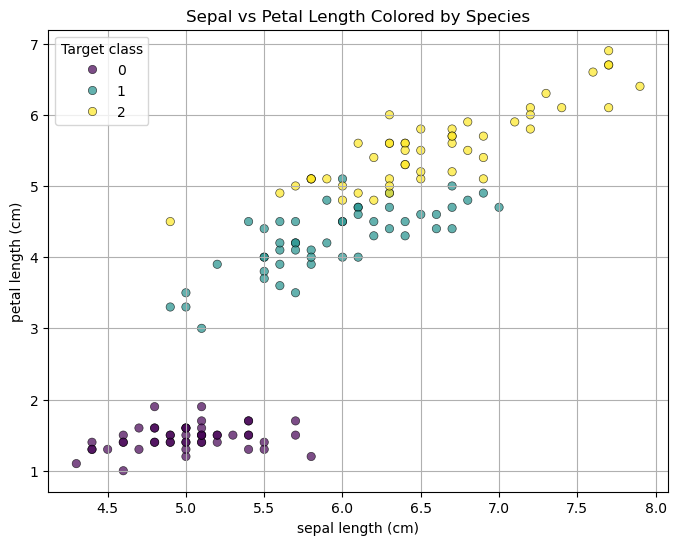

In [43]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
data=load_iris()
X=pd.DataFrame(data.data,columns=data.feature_names)
X['target']=data.target
target=X['target']
data=X.drop(columns="target")
model=LogisticRegression(random_state=0,max_iter=500).fit(data,target)
model.score(data,target)
#data["sepal length (cm)"].describe()
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42, test_size=0.25
)
print(
    f"Number of samples in testing: {data_test.shape[0]} => "
    f"{data_test.shape[0] / data.shape[0] * 100:.1f}% of the"
    " original set"
)
print(
    f"Number of samples in training: {data_train.shape[0]} => "
    f"{data_train.shape[0] / data.shape[0] * 100:.1f}% of the"
    " original set"
)
target_predicted = model.predict(data_train)
print(accuracy_score(target_train,target_predicted))
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(target_train,target_predicted))
print("\nClassification Report:\n", classification_report(target_train,target_predicted))
#_ = X.hist(figsize=(30, 14))
data.describe()
sepal_length=X['sepal length (cm)']
petal_length=X['petal length (cm)']
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='sepal length (cm)', y='petal length (cm)',
    hue='target',
    palette='viridis', data=X, alpha=0.7, edgecolor='k'
)
plt.title('Sepal vs Petal Length Colored by Species')
plt.grid(True)
plt.legend(title='Target class')
plt.show()
